### Specifying Seasonalities
* Prophetはデフォルトで、週次・年次の季節性にフィットする。時系列が2サイクル以上あれば。
* また1日より短い単位の時系列データであれば、日次の季節性にフィットする。
* `add_seasonality`メソッドを用いることで、月次・四半期・時間単位の季節性を追加できる。

#### add_seasonality
* 引数に`name`,`period`として季節性の期間日数、`fourier_order`として季節性のフーリエ項をとる。
* フーリエ項の値を増やすと、季節性が変化のサイクルに早くフィットするようになる（？）。overfitに繋がる。
* フーリエ項の値 $N$ は、サイクルをモデリングするのに $2N$ の変数を用いていることに対応する（変化点が$2N$ということ？）
* Prophetはデフォルトで、週次の季節性には3、年次の季節性には10の値を用いている。`add_seasonality`へのオプションの引数は、季節成分の事前スケールである（？）

In [2]:
%matplotlib inline
from fbprophet import Prophet
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('./input/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=366)

* `weekly_seasonality`を削除。`monthly`を追加している。
* `fourier_order=5`

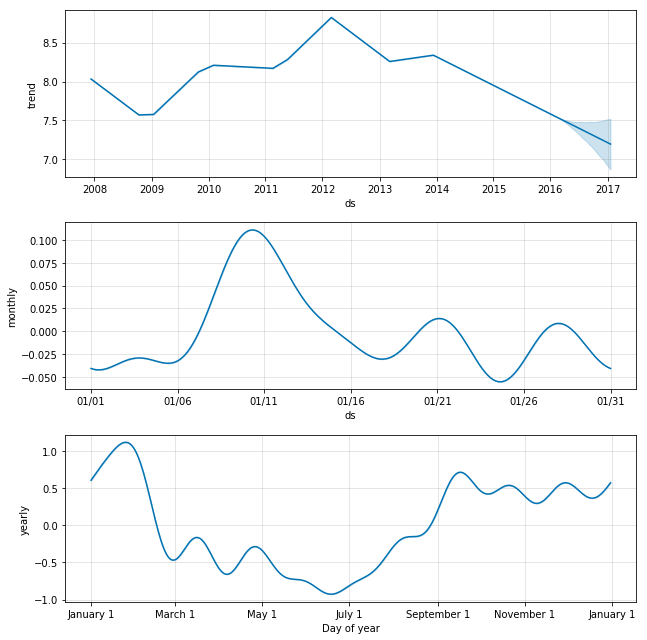

In [3]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
m.plot_components(forecast);

* `fourier_order=2`
* monthlyのグラフの波が減っている

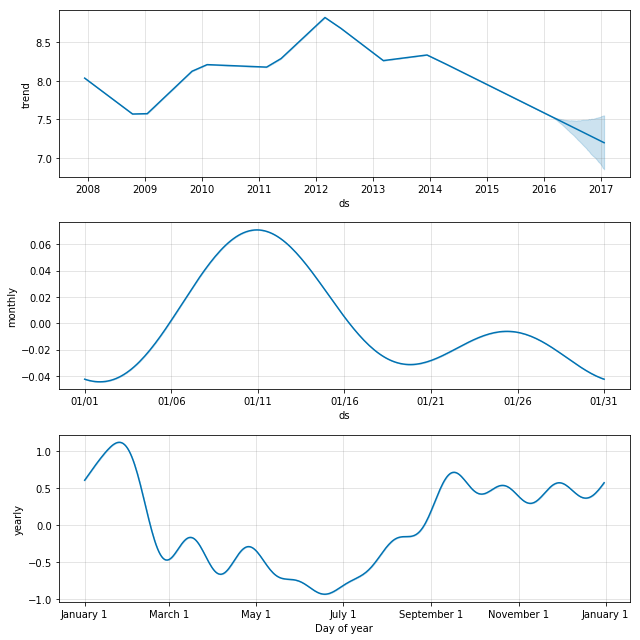

In [4]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=2)
forecast = m.fit(df).predict(future)
m.plot_components(forecast);

* `fourier_order=10`
* monthlyのグラフの波が増えた。

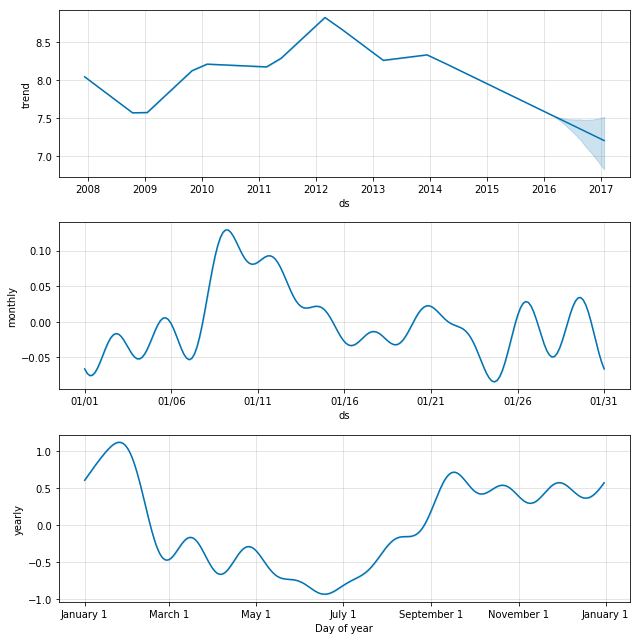

In [5]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
forecast = m.fit(df).predict(future)
m.plot_components(forecast);